<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Закон-больших-чисел" data-toc-modified-id="Закон-больших-чисел-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Закон больших чисел</a></span><ul class="toc-item"><li><span><a href="#ЗБЧ" data-toc-modified-id="ЗБЧ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ЗБЧ</a></span></li><li><span><a href="#Сходимость-по-вероятности" data-toc-modified-id="Сходимость-по-вероятности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Сходимость по вероятности</a></span></li><li><span><a href="#Расходимость--по-вероятности" data-toc-modified-id="Расходимость--по-вероятности-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Расходимость  по вероятности</a></span></li></ul></li></ul></div>



#  Закон больших чисел

В этом блокноте мы просимулируем картинку из презентации для Закона больших чисел и немного обсудим сходимость по вероятности.

---------------

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## ЗБЧ

#### Слабая форма ЗБЧ (Пафнутий Львович Чебышёв)

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$


__Давайте нарисуем ЗБЧ.__ Мы знаем, что математическое ожидание игральной кости это $3.5$. Сделаем симуляцию: 

* подкинем кость 1 раз, посчитаем среднее число на ней
* подкинем кость 2 раза, посчитаем среднее число на ней

.....

* подкинем кость 100 раз, посчитаем среднее число на ней

Построим картинку для всех этих средних и убедимся в том, что оно и правда сходится к $3.5$.

In [2]:
n_obs = 100

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x

array([2, 1, 3, 4, 4, 5, 2, 3, 2, 3, 5, 4, 1, 3, 1, 6, 4, 4, 5, 3, 2, 1,
       2, 3, 4, 2, 5, 4, 2, 5, 5, 1, 3, 1, 3, 2, 5, 5, 4, 3, 5, 3, 1, 4,
       4, 6, 1, 4, 3, 5, 4, 5, 3, 2, 5, 1, 2, 1, 4, 6, 1, 6, 5, 1, 6, 5,
       2, 4, 1, 2, 5, 3, 5, 1, 4, 1, 6, 5, 4, 1, 4, 2, 5, 4, 5, 2, 1, 2,
       1, 5, 6, 6, 1, 6, 3, 6, 4, 3, 6, 3])

In [3]:
# считаем кумулятивную сумму
x_cumsum = np.cumsum(x)
x_cumsum[:5]

array([ 2,  3,  6, 10, 14])

In [4]:
np.arange(1, n_obs + 1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [5]:
# делим на число наблюдений
x_mean = x_cumsum/np.arange(1, n_obs + 1)
x_mean

array([2.        , 1.5       , 2.        , 2.5       , 2.8       ,
       3.16666667, 3.        , 3.        , 2.88888889, 2.9       ,
       3.09090909, 3.16666667, 3.        , 3.        , 2.86666667,
       3.0625    , 3.11764706, 3.16666667, 3.26315789, 3.25      ,
       3.19047619, 3.09090909, 3.04347826, 3.04166667, 3.08      ,
       3.03846154, 3.11111111, 3.14285714, 3.10344828, 3.16666667,
       3.22580645, 3.15625   , 3.15151515, 3.08823529, 3.08571429,
       3.05555556, 3.10810811, 3.15789474, 3.17948718, 3.175     ,
       3.2195122 , 3.21428571, 3.1627907 , 3.18181818, 3.2       ,
       3.26086957, 3.21276596, 3.22916667, 3.2244898 , 3.26      ,
       3.2745098 , 3.30769231, 3.30188679, 3.27777778, 3.30909091,
       3.26785714, 3.24561404, 3.20689655, 3.22033898, 3.26666667,
       3.2295082 , 3.27419355, 3.3015873 , 3.265625  , 3.30769231,
       3.33333333, 3.31343284, 3.32352941, 3.28985507, 3.27142857,
       3.29577465, 3.29166667, 3.31506849, 3.28378378, 3.29333

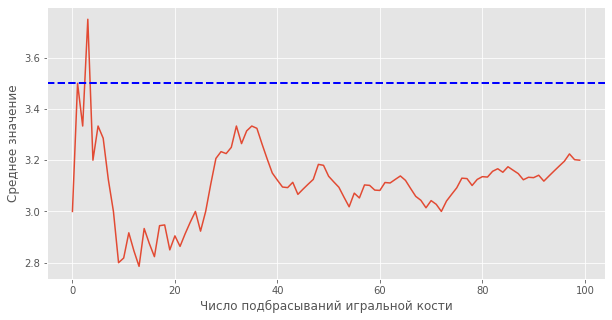

In [6]:
plt.figure(figsize=(10,5))
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_mean = np.cumsum(x)/np.arange(1, n_obs + 1)
plt.plot(x_mean)
plt.axhline(3.5, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

## Сходимость по вероятности

Увидели, что оно сходится? Вопрос только в том как именно. Над стрелкой в ЗБЧ есть буква $p$. 

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

Она означает, что последовательность случайных величин слева сходится к случайной величине справа по вероятности, то есть чем больше $n$ тем ближе вероятность отклонения $\bar x_n$ от $E(X)$ к нулю: 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon) \to 0
$$

Нарисуем её! Возьмём $\varepsilon = 0.01$, нарисуем на нашей картинке из предыдущего упражнения коридор $3.5 \pm \varepsilon$, продолжим ряд до $100000$ подбрасываний и увидим, как постепенно $\bar x_n$ попадает в коридор и всё реже выбивается из него. 

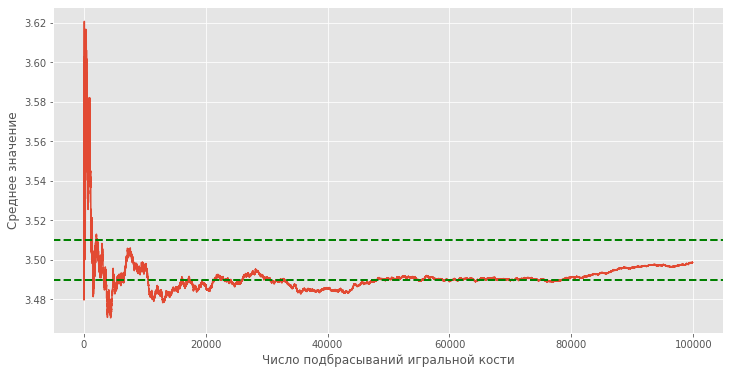

In [7]:
n_obs = 100000

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_cumsum = np.cumsum(x)

x_mean = x_cumsum/np.arange(1, n_obs + 1)

eps = 0.01

plt.figure(figsize=(12,6))
plt.plot(x_mean[100:])
plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого давайте сгенерируем много-много траекторий для игральной кости, как на картинке выше. А после посмотрим как часто на конкретном шаге эти траектории пробивают коридор $3.5 \pm \varepsilon$. Частота таких пробоин будет оценкой вероятности 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon).
$$

In [8]:
n_obs = 10**4

# каждый раз подбрасываем кубик 1000 раз
x = np.random.choice(np.arange(1,7), size=(n_obs, 1000))

# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_cumsum = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_cumsum.shape

(10000, 1000)

In [9]:
x_cumsum

array([[6.        , 2.        , 3.        , ..., 4.        , 1.        ,
        1.        ],
       [5.5       , 4.        , 3.5       , ..., 4.5       , 3.5       ,
        2.5       ],
       [5.        , 4.33333333, 4.33333333, ..., 4.33333333, 2.66666667,
        2.        ],
       ...,
       [3.47459492, 3.48269654, 3.48309662, ..., 3.50920184, 3.4594919 ,
        3.50430086],
       [3.47434743, 3.48244824, 3.48334833, ..., 3.50945095, 3.45974597,
        3.50425043],
       [3.4743    , 3.4825    , 3.4831    , ..., 3.5093    , 3.4597    ,
        3.5042    ]])

In [10]:
x_cumsum[:,:10].shape

(10000, 10)

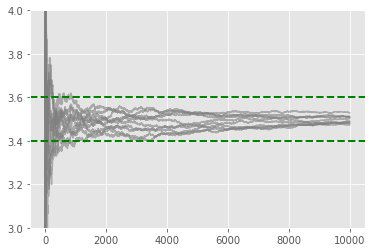

In [11]:
eps= 0.1
plt.plot(x_cumsum[:10000,:10], alpha=0.6, c='grey')


plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.ylim(3,4)

plt.show()

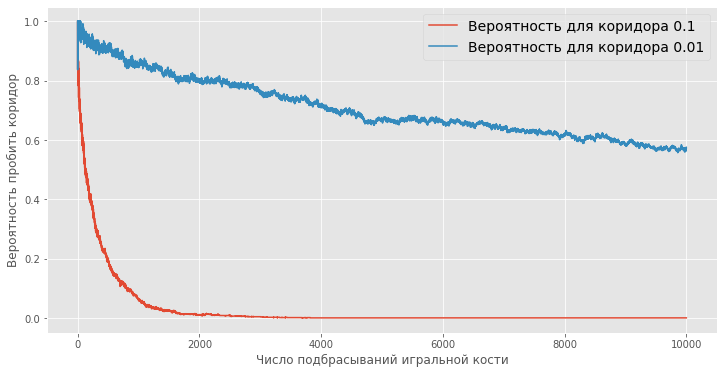

In [12]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_cumsum - 3.5) > eps1
bad_events_2 = np.abs(x_cumsum - 3.5) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1, label = f"Вероятность для коридора {eps1}")
plt.plot(proba_2, label = f"Вероятность для коридора {eps2}")
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор')
plt.legend(fontsize=14);

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. При этом для более узкого коридора вероятность убывает медленнее, что логично :) 

Для нашей ситуации со сходимостью к константе можно построить аналогичные графики для дисперсии среднего. Немного позже мы её вычислим. Окажется, что это 

$$
Var(\bar x_n) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. __Важно держать в голове, что дисперсия убывает только при сходимости к константе!__

Давайте посмотрим на то как все три картинки выглядят рядом. На них нарисовано, как среднее $\bar x$, посчитанное по выборке $x_1, \ldots, x_n \sim iid N(2,1),$ сходится по вероятности к $2$. 

<center>
<img src="image/animation_prob_conv.gif" width="1800"> 
</center>

## Расходимость  по вероятности


Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие.

Распределение Коши тот ещё фрукт. У стандартного распределения Коши такая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит красиво. Красота, при этом, приносит нам кучу проблем. Одна из таких проблем - это отсутствие математического ожидания и дисперсии. ЗБЧ говорит нам, что для некоторых распределений 

$$ 
P( \mid \bar x - E(X)\mid \ge \varepsilon  ) \to 0, 
$$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Интересно было бы узнать к чему будет сходиться выборочное среднее для распределения Коши __(математического ожидания то не существует).__ 

Построим для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ чуть выше. 

In [13]:
cauchy_rv = sts.cauchy()  # генератор 

n_obs = 10**4

# 1000 траекторий по n_obs шагов
x = cauchy_rv.rvs(size = (n_obs,1000))
x.shape

(10000, 1000)

In [14]:
# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_mean = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_mean.shape

(10000, 1000)

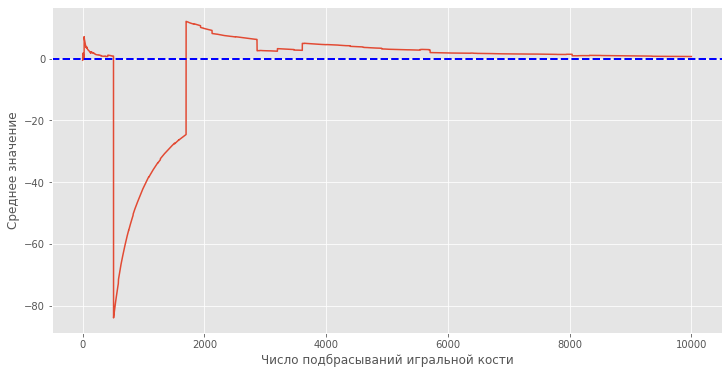

In [15]:
# Нарисуем одну любую траекторию

plt.figure(figsize=(12,6))
plt.plot(x_mean[:,442])
plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Тут может банально повести и траектория будет визуально выглядеть хорошо. Но что происходит с вероятностями? 

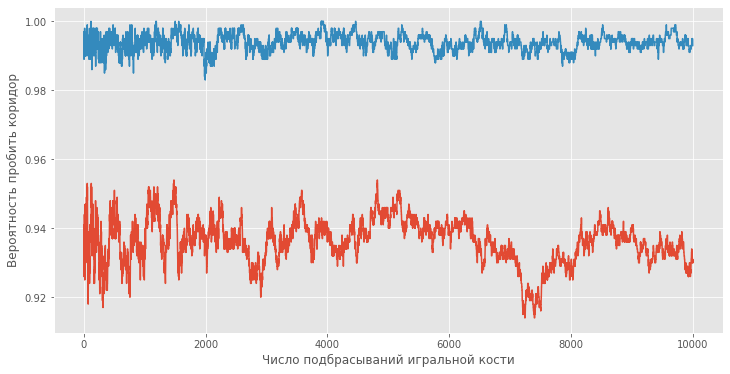

In [16]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_mean - 0) > eps1
bad_events_2 = np.abs(x_mean - 0) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1)
plt.plot(proba_2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор');

Никакого движения к нулю. Постоянные пробоины в нашем коридоре. При этом во времени их количество никак не уменьшается. Так выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоины не очень важна. В случае, когда сходимость есть, пробоины также могут быть очень большими, но они происходят всё реже.

Давайте посмотрим на то как все три картинки выглядят рядом. На них изобразим первые $200$ шагов для распределения Коши. Чисто визуально сравните с первыми $200$ шагами для нормального распределения из предыдущего упражнения и ужаснитесь. 

<center>
<img src="image/animation_prob_unconv.gif" width="1400"> 
</center>